In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
print(os.path.abspath('.'))

/home/gdp/DeepPurpose


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error

In [5]:
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
from DeepPurpose import utils, models, dataset

In [6]:
model2 = models.model_pretrained(path_dir = './model_MPNN_CNN_DTC/')
model2

In [7]:
model2.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 128,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 1024,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'MPNN',
 'target_encoding': 'CNN',
 'result_folder': './result/',
 'binary': False,
 'num_workers': 10,
 'mpnn_hidden_size': 128,
 'mpnn_depth': 3,
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'decay': 0}

In [8]:
Smile = np.load("DTC_smiles_reg.npy", allow_pickle=True)
Target = np.load("DTC_targets_reg.npy", allow_pickle=True)
y = np.load("DTC_y_reg.npy", allow_pickle=True)
print('Done!')

Done!


In [9]:
drug = pd.DataFrame(Smile,columns=['drug'])
drug.head(1)

,drug
0,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21


In [10]:
drug2 = drug['drug'].unique()

In [11]:
drug2 = pd.DataFrame(drug2,columns=['drug'])
drug2.head(1)

,drug
0,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21


In [ ]:
#-----performance of the model on all data(test subset)

In [12]:
X_drug = Smile.tolist()
X_target = Target.tolist() 
y = y.tolist()

drug_encoding, target_encoding = 'MPNN', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


in total: 61479 drug-target pairs
encoding drug...
unique drugs: 7626
drug encoding finished...
encoding protein...
unique target sequence: 895
protein encoding finished...
splitting dataset...
do not do train/test split on the data for already splitted data


In [13]:
y_pred = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


In [14]:
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_.to_csv('y_pred_MPNN_CNN_DTC.csv')

In [15]:
MSE = mean_squared_error(y_label, y_pred)
CI = concordance_index(y_label, y_pred)

print(MSE)
print(CI)

0.05389203374261703
0.9698339862340095


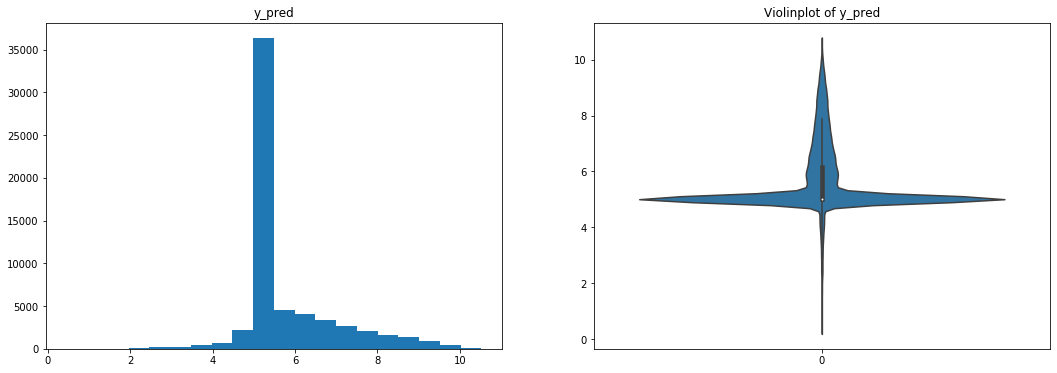

In [16]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [17]:
#-----screen potential drugs for Tie2

In [18]:
X_drug = drug2['drug'].values.tolist()
X_target = ['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA']
y = np.ones(len(drug2)).tolist()

drug_encoding, target_encoding = 'MPNN', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


in total: 7626 drug-target pairs
encoding drug...
unique drugs: 7626
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
do not do train/test split on the data for already splitted data


In [19]:
y_pred = model2.predict(X) 
#y_pred, sum_uncer = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


In [20]:
def convert_y_unit(y, from_, to_):
	# basis as nM

	if from_ == 'nM':
		y = y
	elif from_ == 'p':
		y = 10**(-y) / 1e-9

	if to_ == 'p':
		y = -np.log10(y*1e-9 + 1e-10)
	elif to_ == 'nM':
		y = y

	return y

In [21]:
y_pred = convert_y_unit(np.array(y_pred), 'p', 'nM')

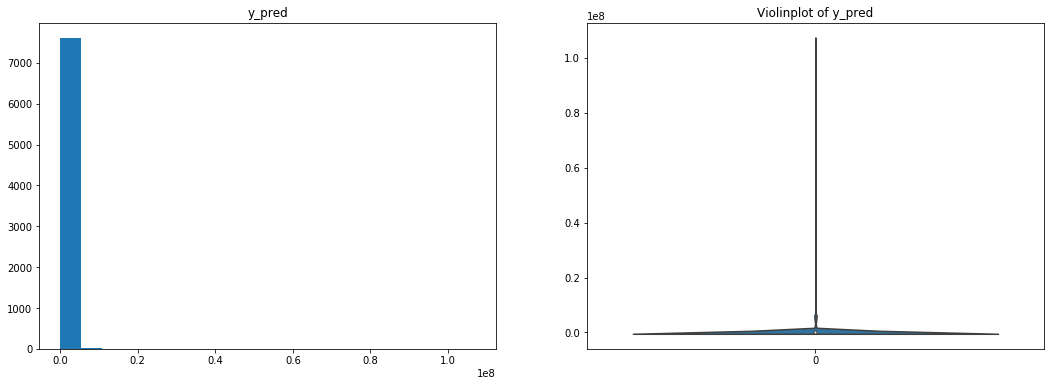

In [22]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [23]:
a=drug2
a

,drug
0,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
1,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...
2,CO[C@@H]1[C@@H](COS(=O)(=O)[O-])O[C@H](O[C@H]2...
3,O=C(O)c1sc2cc(Cl)ccc2c1Cl
4,CCCCc1cc(N2CC[C@@H](NC)C2)nc(N)n1
...,...
7621,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...
7622,CO[C@H]1O[C@H](CO)[C@H](O)[C@H](OCc2cn([C@@H](...
7623,CC(C)N1CCC(COc2ncc(C(=O)c3cccc(Cl)c3)n2C)CC1
7624,Cc1ccc(C(=O)NC2CC2)cc1NC(=O)c1cnn(-c2ncccc2C(F...


In [24]:
b=pd.DataFrame(y_pred,columns=['y_pred'])
b

,y_pred
0,1023.971247
1,2589.495498
2,384.792022
3,39270.172156
4,545.782415
...,...
7621,9350.497793
7622,209808.980661
7623,5.683886
7624,17.696859


In [25]:
c=pd.concat([a,b],axis=1)
c

,drug,y_pred
0,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,1023.971247
1,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...,2589.495498
2,CO[C@@H]1[C@@H](COS(=O)(=O)[O-])O[C@H](O[C@H]2...,384.792022
3,O=C(O)c1sc2cc(Cl)ccc2c1Cl,39270.172156
4,CCCCc1cc(N2CC[C@@H](NC)C2)nc(N)n1,545.782415
...,...,...
7621,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,9350.497793
7622,CO[C@H]1O[C@H](CO)[C@H](O)[C@H](OCc2cn([C@@H](...,209808.980661
7623,CC(C)N1CCC(COc2ncc(C(=O)c3cccc(Cl)c3)n2C)CC1,5.683886
7624,Cc1ccc(C(=O)NC2CC2)cc1NC(=O)c1cnn(-c2ncccc2C(F...,17.696859


In [26]:
c.to_csv('y_pred_TIE2_MPNN_CNN_DTC.csv')

In [27]:
d=c.sort_values(axis=0, ascending=True, by='y_pred')
d

,drug,y_pred
1477,OC(c1ccccc1)(c1ccccc1)C12CC[N+](CCOCc3ccc(Cl)c...,8.600290e-01
6840,Cc1cccc(COCC[N+]23CCC(C(O)(c4ccccc4)c4ccccc4)(...,9.506730e-01
5502,Cc1ccc(COCC[N+]23CCC(C(O)(c4ccccc4)c4ccccc4)(C...,1.156147e+00
3841,OC(c1ccccc1)(c1ccccc1)C12CC[N+](CCOCc3ccc(Br)c...,1.167769e+00
4685,C#C[C@]1(O)CC[C@H]2[C@@H]3CC[C@H]4CC(=O)CC[C@]...,1.174672e+00
...,...,...
2105,CO[C@@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@@H]1O,1.108709e+07
1242,Cc1cn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[...,1.415210e+07
1889,CCCCCO[C@H]1O[C@H](COS(=O)(=O)[O-])[C@@H](O[C@...,1.985122e+07
956,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...,4.616619e+07


In [28]:
d.to_csv('y_pred_TIE2_MPNN_CNN_DTC_SORTED.csv')